# Genetic diversity analyses using *Eurycea longicauda* ddRAD SNP data
### By: Neha Savant

Another way to understand how the populations differ from one another genetically, we can investigate genetic diversity of each population and between populations. Here I will use `adegenet` and `hierfstats` package in R. This tutorial has been adapted from https://popgen.nescent.org/StartSNP.html

In [19]:
#Load relevant packages
library("adegenet")
library("hierfstat")
library("pegas")

In [20]:
#Set working directory
setwd("~/Dropbox/Columbia_New_York/Salamanders/Downstream_Analyses/Genetic_Diversity")

`adegenet` and `heirfstat` both use genid objects (which can be created using genomic filtering programs like *Stacks*). Here I load in a genid object of all 255 samples.

In [21]:
gen<-read.genepop("batch_1.gen")


 Converting data from a Genepop .gen file to a genind object... 


File description:  Stacks version 1.42; Genepop version 4.1.3; March 31, 2018 

...done.



Then we use this object to get a summary of the data to be analyzed

In [5]:
div <- summary(gen) #use the genid object here
div

#These make sense because all loci should only have 2 loci (A or T; C or G)
#Percentage of missing data = 12.19%
#Number of alleles/group (SNPs): 15780 15395 17832 13763 18760 17830 15692 15860 11750 19241 6663 14489 17926 17483 16267


// Number of individuals: 255
// Group sizes: 11 3 17 4 19 20 18 10 1 44 9 25 12 32 30
// Number of alleles per locus: 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

We can also create plots to help us visualize the observed heterozygosity per locus. 

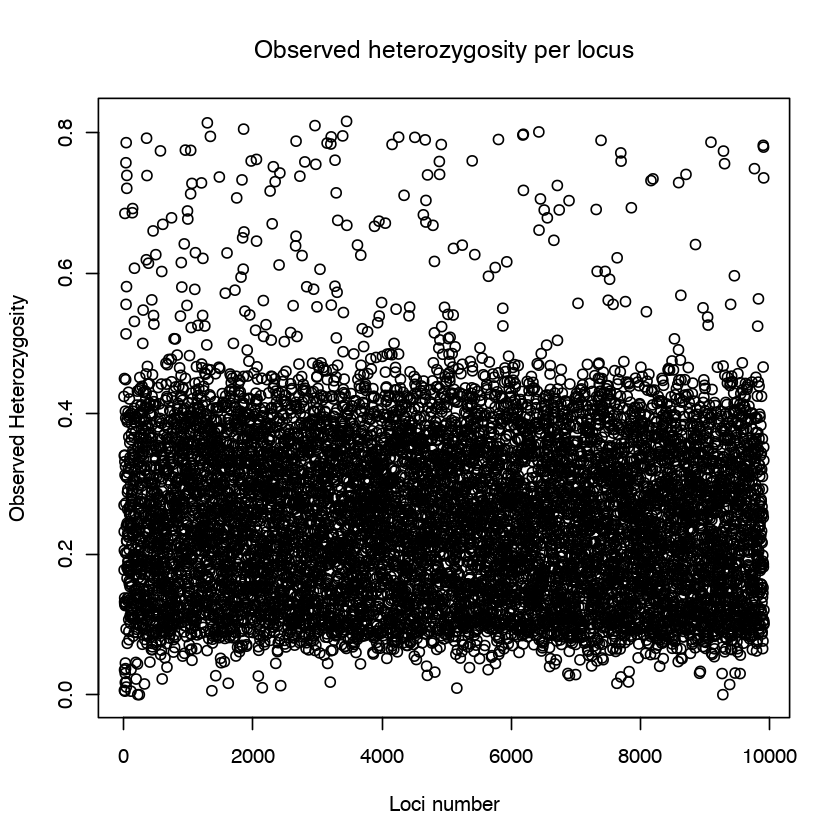

In [6]:
#Observed heterozygosity per locus
plot(div$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", main="Observed heterozygosity per locus")

#Here most of the samples have heterozygosity between 0.05 and 0.45

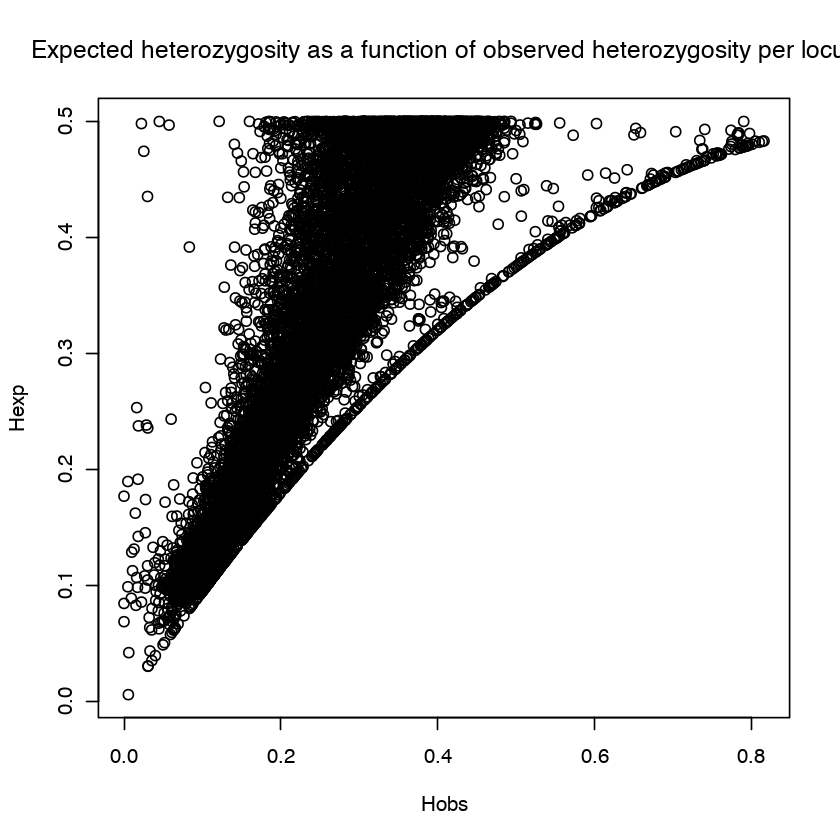

In [7]:
#Expected heterozygosity as a function of observed heterozygosity per locus
plot(div$Hobs,div$Hexp, xlab="Hobs", ylab="Hexp", main="Expected heterozygosity as a function of observed heterozygosity per locus")

Next we run a Barltlett where we can observe in this data there is a significant (p-value <<< 0.001) difference betweene expected and observed heterozygosity. But this could be an artifact of the extremely high sample size of loci we have with our thousands of SNPs. 

In [25]:
bartlett.test(list(div$Hexp, div$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(div$Hexp, div$Hobs)
Bartlett's K-squared = 143.31, df = 1, p-value < 2.2e-16


Next, I used the `heirfstats` packages ([see package details here](https://cran.r-project.org/web/packages/hierfstat/hierfstat.pdf)) to understand basic statistics in the data. The function `basic.stats()` provides the observed heterozygosity (Ho), mean gene diversities within populations (Hs, Fis,Fst) for each SNP (this is tens of thousands of SNPs).

In [26]:
basicstat <- basic.stats(gen, diploid = TRUE, digits = 2)  # Fst following Nei (1987) on genind object

 To access the many values within this "basicstat" object you created use the "$" symbol. For example: 
- To see a series of tables for each loci where populations are in columns and the alleles are in a row enter `basicstat$pop.freq`. 
To create a table with 15 columns (one for each pop) and one row for the observed heterozygosities for each loci you would enter `basicstat$Ho`.
- `basicstat$Hs` for a table with 15 columns and one row for the observed gene diversity of each loci
- `basicstat$Fis` for a table with 15 columns and one row for the observed Fis of each loci
- `basicstat$perloc` (this is the default when you enter `basicstat`) for a table with a row for each loci and in each column is one basic stat (i.e. Ho, Hs, Ht, Dst, Ht', Dst', Fst, Fst', Fis, Dest)
- `basicstat$overall` for basic statistics averaged over loci

In [31]:
basicstat$pop.freq

$X1_36
   
x   CAPO014 COOK003 HAKI017 HARI005 LNIS019 STRI006 MUCK025 MUKA010 MUTH001
  1            0.33    0.50            0.47    0.56    0.53    0.44    0.00
  3            0.67    0.50            0.53    0.44    0.47    0.56    1.00
   
x   WICK015 SVEN009 SWAR027 WARF013 WHIT053 WPOA030
  1    0.78            0.77    0.70    0.62    0.43
  3    0.22            0.23    0.30    0.38    0.57

$X23188_14
   
x   CAPO014 COOK003 HAKI017 HARI005 LNIS019 STRI006 MUCK025 MUKA010 MUTH001
  3    0.56            0.94    1.00    0.92            0.91    0.75    0.50
  4    0.44            0.06    0.00    0.08            0.09    0.25    0.50
   
x   WICK015 SVEN009 SWAR027 WARF013 WHIT053 WPOA030
  3    0.74    0.62    1.00    0.59    0.68    0.81
  4    0.26    0.38    0.00    0.41    0.32    0.19

$X24292_90
   
x   CAPO014 COOK003 HAKI017 HARI005 LNIS019 STRI006 MUCK025 MUKA010 MUTH001
  1    0.05    0.33    0.12            0.21    0.11    0.00    0.00    0.00
  3    0.95    0.67    0.88  

In [38]:
#The function `boot.ppfis()` performs bootstrappling over loci of population's Fis. 

boot_fis <- boot.ppfis(gen)

In [39]:
boot_fis$fis.ci #Provides confidence interval for Fis for each of the populations in the data. 
# ll = lower limit ci
# hl = upper limit ci

ll      hl     
1   0.0407  0.0552
2   0.0469  0.0758
3   0.0636  0.0761
4   0.0224  0.0498
5   0.0398  0.0520
6   0.0716  0.0833
7   0.0092  0.0277
8  -0.0227 -0.0052
9     -Inf    -Inf
10  0.0481  0.0562
11  0.0931  0.1313
12 -0.0188  0.0006
13  0.0381  0.0542
14  0.0234  0.0354
15  0.0542  0.0665

Here we will use a PCA to visualize the matrix of individual's allele freqeuencies. Remember a PCA does not have a genetic model behind it. 

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 3,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,

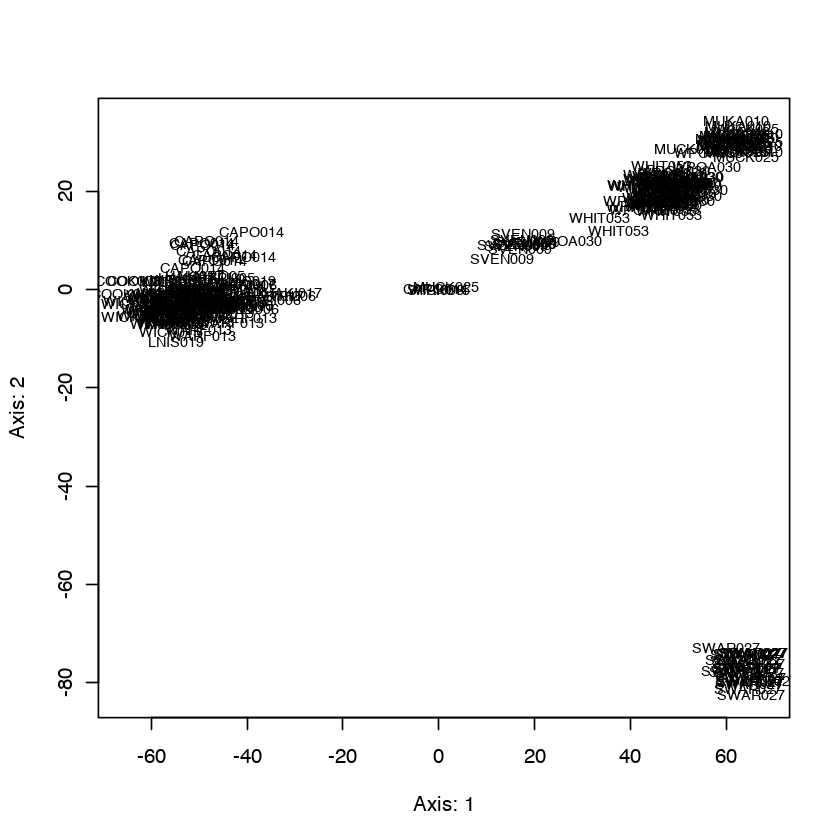

In [15]:
mydata <- genind2hierfstat(gen) #creates a hierfstat object from a genid object

x <- indpca(mydata) #runs a PCA on the centered matrix of indiviual's allele frequencies.

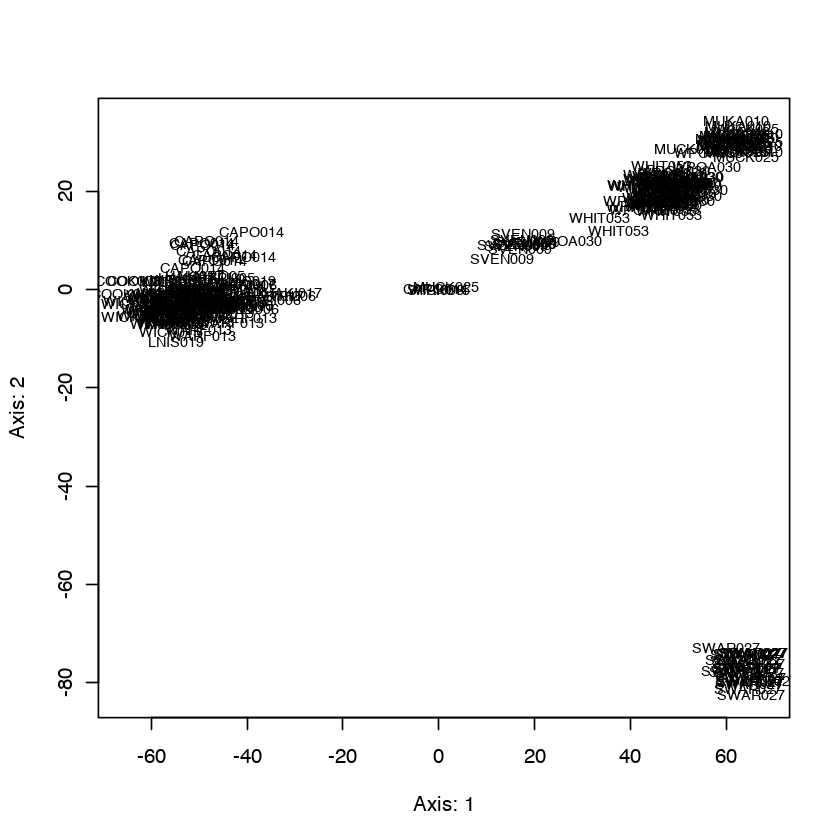

In [16]:
#plotting PC1 and PC2
plot(x, cex = 0.7)

Can also test for Hardy Weinberg equilibrium for each SNP locus using the function `hw.test` from the `pegas` package. It will output a five column matrix that includes the Chi-square value and p-value for each loci. Technically if the p-value is less than 0.05, then that loci exhibits genetic diversity trends that are significantly different from Hardy-Weinberg equilibrium. I don't think this kind of analysis is that helpful for SNP data because there are so many loci. 

In [17]:
hw.test(gen, B = 1000)

chi^2       df Pr(chi^2 >)  Pr.exact
1_36         3.0325493 1  8.160970e-02 0.088   
23188_14     5.2979651 1  2.135035e-02 0.034   
24292_90     5.4647692 1  1.940362e-02 0.022   
24442_71     1.2936728 1  2.553722e-01 0.280   
28566_93     5.7051077 1  1.691562e-02 0.024   
28808_98     2.4236101 1  1.195192e-01 0.227   
28815_38   119.6155531 1  0.000000e+00 0.000   
28870_90     0.1407936 1  7.074934e-01 0.745   
28961_100   25.8013754 1  3.784187e-07 0.006   
29141_40    43.8670170 1  3.514622e-11 0.000   
29175_14    38.4941716 1  5.491745e-10 0.000   
29182_65     0.9610967 1  3.269107e-01 1.000   
29261_80     7.4310377 1  6.410836e-03 0.004   
29472_5      7.8643853 1  5.041796e-03 0.002   
29487_41    54.2699764 1  1.747491e-13 0.000   
29588_63   182.2167314 1  0.000000e+00 0.000   
30307_73    31.7951719 1  1.713181e-08 0.000   
30360_75     1.0542158 1  3.045381e-01 0.599   
31448_105   16.0409879 1  6.198595e-05 0.001   
31534_28   150.3299477 1  0.000000e+00 0.000   
31541_99   157.6151331 1  0.000000e+00 0.000   
31725_116  165.6126274 1  0.000000e+00 0.000   
31762_74     8.3549021 1  3.846482e-03 0.001   
31765_119   28.2990030 1  1.039495e-07 0.000   
32378_17    98.1948280 1  0.000000e+00 0.000   
33207_40    28.6715094 1  8.575615e-08 0.000   
33350_20    18.6274182 1  1.589185e-05 0.000   
33459_62     9.2795219 1  2.317299e-03 0.005   
35097_76     2.2359049 1  1.348377e-01 0.131   
35100_65    12.5779203 1  3.903308e-04 0.001   
⋮          ⋮           ⋮  ⋮            ⋮       
325787_8    6.7008547  1  9.636671e-03 0.015   
325790_108 11.8035374  1  5.911829e-04 0.012   
325821_17  12.0000000  1  5.320055e-04 0.004   
325957_54  28.6686396  1  8.588333e-08 0.000   
325965_42   0.0545187  1  8.153791e-01 0.846   
325999_13  25.3702551  1  4.731579e-07 0.000   
326012_31  63.9696907  1  1.221245e-15 0.000   
326075_67  32.6562461  1  1.099854e-08 0.000   
326080_80  45.9188729  1  1.232525e-11 0.000   
326100_109 33.4884253  1  7.168935e-09 0.000   
326105_82   5.1347135  1  2.345196e-02 0.041   
326115_34  26.6763729  1  2.405450e-07 0.000   
326147_19   1.1823080  1  2.768866e-01 0.210   
326168_101 16.3129307  1  5.369629e-05 0.003   
326279_16  22.1555531  1  2.514277e-06 0.000   
326296_17  36.7322698  1  1.355175e-09 0.000   
326350_24   0.8926990  1  3.447470e-01 0.353   
333883_31  68.1201045  1  1.110223e-16 0.000   
338331_110 10.3780361  1  1.275233e-03 0.001   
339370_22  56.0444891  1  7.083223e-14 0.000   
345101_43   1.8700000  1  1.714751e-01 0.379   
346040_38   4.9710783  1  2.577457e-02 0.061   
346400_35  83.1813035  1  0.000000e+00 0.000   
349040_7    0.5898692  1  4.424697e-01 1.000   
351372_30  70.3938470  1  0.000000e+00 0.000   
358474_9    0.1688367  1  6.811477e-01 0.714   
370002_72   7.6972780  1  5.530417e-03 0.007   
374502_76   0.3401790  1  5.597259e-01 0.427   
382312_75   0.8858259  1  3.466110e-01 1.000   
400626_108 24.4193391  1  7.748693e-07 0.000

Below we record the session information which gives us useful information for reproducibility. Of particular importance are the versions of R and the packages used to create this workflow. 

In [37]:
options(width = 100)
devtools::session_info()

Session info --------------------------------------------------------------------------------------
Packages ------------------------------------------------------------------------------------------


 setting  value                       
 version  R version 3.4.2 (2017-09-28)
 system   x86_64, darwin15.6.0        
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 tz       America/New_York            
 date     2018-06-03                  

 package    * version     date       source                            
 ade4       * 1.7-11      2018-04-05 cran (@1.7-11)                    
 adegenet   * 2.1.1       2018-02-02 CRAN (R 3.4.3)                    
 ape        * 5.0         2017-10-30 CRAN (R 3.4.2)                    
 assertthat   0.2.0       2017-04-11 CRAN (R 3.4.0)                    
 base       * 3.4.2       2017-10-04 local                             
 base64enc    0.1-3       2015-07-28 cran (@0.1-3)                     
 bindr        0.1         2016-11-13 CRAN (R 3.4.0)                    
 bindrcpp     0.2         2017-06-17 CRAN (R 3.4.0)                    
 boot         1.3-20      2017-08-06 CR